In [24]:
import pandas as pd
import re
import json
from PIL import Image
import random

In [20]:
plane_df = pd.read_csv('openai_results_plane.csv', index_col=0)
plane_df.rename(columns={'img_id': 'image_id'}, inplace=True)
ship_df = pd.read_csv('openai_results_ship.csv')
ship_df.rename(columns={'img_id': 'image_id'}, inplace=True)
aug_df = pd.read_csv('openai_results_aug.csv')
aug_df.rename(columns={'img_id': 'image_id'}, inplace=True)

Index(['prompt', 'reply', 'time', 'image_id', 'img_path'], dtype='object')
Describe every item in the image
index                                                     166
prompt                       Describe every item in the image
reply       The image shows an aerial view of a section of...
time                                                 6.120195
image_id                                                  554
img_path    E:/datasets/DOTA_dataset_512/val/images/P0179_...
Name: 83, dtype: object
The image shows an aerial view of a section of land that appears to be part of an airfield or similar facility. Here are the items visible in the image:

1. **Two Airplanes**: There are two small airplanes with white bodies and blue markings parked on a tarmac area. One of the airplanes is positioned slightly behind the other.

2. **Vehicles**: There are two vehicles parked near the airplanes. One looks like a standard white van, and the other appears to be a smaller, possibly utility vehicl

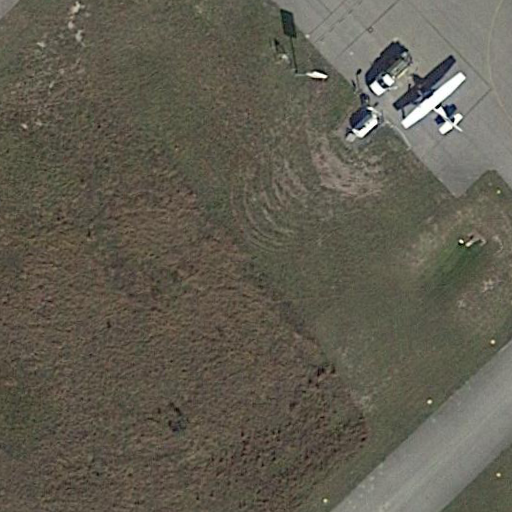

Is there a plane in the image, if so how many?
index                                                     845
prompt         Is there a plane in the image, if so how many?
reply       Yes, there are planes in the image. I can see ...
time                                                 1.965191
image_id                                                 3377
img_path    E:/datasets/DOTA_dataset_512/val/images/P1179_...
Name: 422, dtype: object
Yes, there are planes in the image. I can see a total of 15 planes parked on the tarmac.


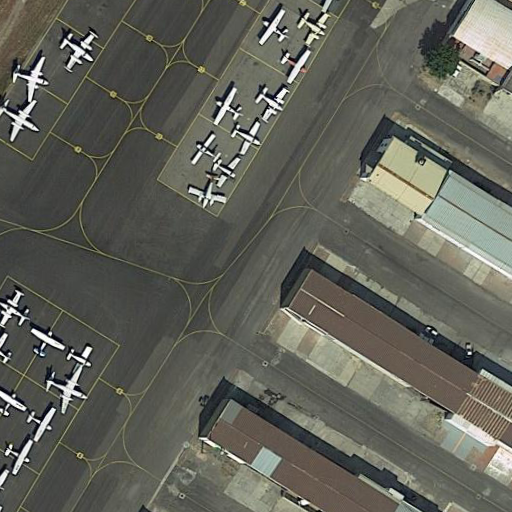

In [30]:
print(plane_df.columns)
for prompt in list(plane_df['prompt'].unique()):
    print(prompt)
    filtered_df = plane_df[plane_df['prompt']==prompt].reset_index()
    rindex = random.choice(filtered_df.index)
    row=filtered_df.iloc[rindex]
    print(row)
    img = Image.open(row.img_path)
    print(row.reply)
    display(img)


In [3]:
context_df =  plane_df[~(plane_df['prompt']=='Is there a plane in the image, if so how many?')]
context_df['time'].mean()

7.587557720565163

In [4]:
aug_df.head()

,prompt,reply,time,image_id,img_path
0,Describe every item in the image,The image appears to be an aerial or satellite...,11.232172,49,E:/datasets/DOTA_dataset_512/aug_images_10_10/...
1,"Is there a ship in the image, if so how many?","In the image provided, there appears to be one...",6.991533,49,E:/datasets/DOTA_dataset_512/aug_images_10_10/...
2,"Is there a plane in the image, if so how many?","In the image provided, there is one airplane v...",3.557856,49,E:/datasets/DOTA_dataset_512/aug_images_10_10/...
3,Describe every item in the image,The image appears to be an aerial or satellite...,9.785288,50,E:/datasets/DOTA_dataset_512/aug_images_10_10/...
4,"Is there a ship in the image, if so how many?",The image you uploaded appears to be an aerial...,3.398340,50,E:/datasets/DOTA_dataset_512/aug_images_10_10/...


In [5]:
with open('E:/datasets/DOTA_dataset_512/val_coco.json') as f:
    gt_json = json.load(f)

category_map = {cat['id']:cat['name'] for cat in gt_json['categories']}
annotation_df = pd.DataFrame(gt_json['annotations'])
annotation_df['category'] = annotation_df['category_id'].map(category_map)
annotation_df=annotation_df[['image_id','category']].drop_duplicates()
annotation_df= annotation_df[annotation_df['category'].isin(['ship','plane'])]
# Group by 'image_id' and aggregate the 'category' column into a list
df_grouped = annotation_df.groupby('image_id')['category'].agg(list).reset_index()

# Optionally, you can join categories into a string if needed
# df_grouped['category'] = df_grouped['category'].apply(lambda x: ', '.join(x))

# Rename the column to 'categories'
df_grouped = df_grouped.rename(columns={'category': 'categories'})

aug_df = pd.merge(aug_df, df_grouped, on='image_id')
display(aug_df.head())
aug_df['contains_ship'] = aug_df['categories'].apply(lambda x: 'ship' in x)
aug_df['contains_plane'] = aug_df['categories'].apply(lambda x: 'plane' in x)
aug_plane_df = aug_df[aug_df['contains_plane']==True]
aug_ship_df = aug_df[aug_df['contains_ship']==True]

display(aug_plane_df.head())
display(aug_ship_df.head())

,prompt,reply,time,image_id,img_path,categories
0,Describe every item in the image,The image appears to be an aerial or satellite...,11.232172,49,E:/datasets/DOTA_dataset_512/aug_images_10_10/...,[ship]
1,"Is there a ship in the image, if so how many?","In the image provided, there appears to be one...",6.991533,49,E:/datasets/DOTA_dataset_512/aug_images_10_10/...,[ship]
2,"Is there a plane in the image, if so how many?","In the image provided, there is one airplane v...",3.557856,49,E:/datasets/DOTA_dataset_512/aug_images_10_10/...,[ship]
3,Describe every item in the image,The image appears to be an aerial or satellite...,9.785288,50,E:/datasets/DOTA_dataset_512/aug_images_10_10/...,[ship]
4,"Is there a ship in the image, if so how many?",The image you uploaded appears to be an aerial...,3.398340,50,E:/datasets/DOTA_dataset_512/aug_images_10_10/...,[ship]


,prompt,reply,time,image_id,img_path,categories,contains_ship,contains_plane
267,Describe every item in the image,The image appears to be an aerial or satellite...,10.187691,413,E:/datasets/DOTA_dataset_512/aug_images_10_10/...,[plane],False,True
268,"Is there a ship in the image, if so how many?",The image you provided appears to be an aerial...,3.975276,413,E:/datasets/DOTA_dataset_512/aug_images_10_10/...,[plane],False,True
269,"Is there a plane in the image, if so how many?","Yes, there is one plane visible in the image. ...",4.010086,413,E:/datasets/DOTA_dataset_512/aug_images_10_10/...,[plane],False,True
270,Describe every item in the image,The image appears to be an aerial view of an a...,11.306075,414,E:/datasets/DOTA_dataset_512/aug_images_10_10/...,[plane],False,True
271,"Is there a ship in the image, if so how many?",The image shows an aerial view of an area with...,3.858694,414,E:/datasets/DOTA_dataset_512/aug_images_10_10/...,[plane],False,True


,prompt,reply,time,image_id,img_path,categories,contains_ship,contains_plane
0,Describe every item in the image,The image appears to be an aerial or satellite...,11.232172,49,E:/datasets/DOTA_dataset_512/aug_images_10_10/...,[ship],True,False
1,"Is there a ship in the image, if so how many?","In the image provided, there appears to be one...",6.991533,49,E:/datasets/DOTA_dataset_512/aug_images_10_10/...,[ship],True,False
2,"Is there a plane in the image, if so how many?","In the image provided, there is one airplane v...",3.557856,49,E:/datasets/DOTA_dataset_512/aug_images_10_10/...,[ship],True,False
3,Describe every item in the image,The image appears to be an aerial or satellite...,9.785288,50,E:/datasets/DOTA_dataset_512/aug_images_10_10/...,[ship],True,False
4,"Is there a ship in the image, if so how many?",The image you uploaded appears to be an aerial...,3.398340,50,E:/datasets/DOTA_dataset_512/aug_images_10_10/...,[ship],True,False


In [6]:
def correct_classification(row):
    if row.contains_plane and not row.contains_ship:
        if row.prompt == 'Is there a plane in the image, if so how many?':
            if 'yes' in row.reply.lower():
                return 1
            else:
                return 0
        else:
            if 'yes' not in row.reply.lower():
                return 1
            else:
                return 0
    elif not row.contains_plane and row.contains_ship:
        if row.prompt == 'Is there a ship in the image, if so how many?':
            if 'yes' in row.reply.lower():
                return 1
            else:
                return 0
        else:
            if 'yes' not in row.reply.lower():
                return 1
            else:
                return 0
    else:
        if row.prompt == 'Is there a ship in the image, if so how many?':
            if 'yes' in row.reply.lower():
                return 1
            else:
                return 0
        else:
            if 'yes' in row.reply.lower():
                return 1
            else:
                return 0


In [7]:
plane_classification_df = plane_df[plane_df['prompt']=='Is there a plane in the image, if so how many?']
plane_classification_df['yes_no'] = plane_classification_df['reply'].str.contains('Yes', case=False).astype(int)

ship_classification_df = ship_df[ship_df['prompt']=='Is there a ship in the image, if so how many?']
ship_classification_df['yes_no'] = ship_classification_df['reply'].str.contains('Yes|boat', case=False).astype(int)

aug_plane_classification_df = aug_plane_df[aug_plane_df['prompt']=='Is there a plane in the image, if so how many?']
aug_plane_classification_df['yes_no'] = aug_plane_classification_df['reply'].str.contains('Yes', case=False).astype(int)

aug_ship_classification_df = aug_ship_df[aug_ship_df['prompt']=='Is there a plane in the image, if so how many?']
aug_ship_classification_df['yes_no'] = aug_ship_classification_df['reply'].str.contains('Yes', case=False).astype(int)

aug_classification_df = aug_df[aug_df['prompt']!='Describe every item in the image']

aug_p_classification_df = aug_classification_df[aug_classification_df['prompt']=='Is there a plane in the image, if so how many?']
aug_p_classification_df['yes_no'] = aug_p_classification_df.apply( correct_classification, axis=1)
display(aug_p_classification_df.head(5))

aug_s_classification_df = aug_classification_df[aug_classification_df['prompt']=='Is there a ship in the image, if so how many?']
aug_s_classification_df['yes_no'] = aug_s_classification_df.apply( correct_classification, axis=1)
display(aug_s_classification_df.head(5))






C:\Users\neals\AppData\Local\Temp\ipykernel_7620\1466514314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane_classification_df['yes_no'] = plane_classification_df['reply'].str.contains('Yes', case=False).astype(int)
C:\Users\neals\AppData\Local\Temp\ipykernel_7620\1466514314.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ship_classification_df['yes_no'] = ship_classification_df['reply'].str.contains('Yes|boat', case=False).astype(int)
C:\Users\neals\AppData\Local\Temp\ipykernel_7620\1466514314

,prompt,reply,time,image_id,img_path,categories,contains_ship,contains_plane,yes_no
2,"Is there a plane in the image, if so how many?","In the image provided, there is one airplane v...",3.557856,49,E:/datasets/DOTA_dataset_512/aug_images_10_10/...,[ship],True,False,1
5,"Is there a plane in the image, if so how many?","Yes, there is a plane visible in the image. Th...",3.132656,50,E:/datasets/DOTA_dataset_512/aug_images_10_10/...,[ship],True,False,0
8,"Is there a plane in the image, if so how many?","Yes, there is one plane visible in the image. ...",3.501304,57,E:/datasets/DOTA_dataset_512/aug_images_10_10/...,[ship],True,False,0
11,"Is there a plane in the image, if so how many?","The image is quite dark and grainy, making it ...",4.564239,61,E:/datasets/DOTA_dataset_512/aug_images_10_10/...,[ship],True,False,1
14,"Is there a plane in the image, if so how many?",The image appears to be an aerial view of a re...,4.021726,66,E:/datasets/DOTA_dataset_512/aug_images_10_10/...,[ship],True,False,1


C:\Users\neals\AppData\Local\Temp\ipykernel_7620\1466514314.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aug_s_classification_df['yes_no'] = aug_s_classification_df.apply( correct_classification, axis=1)


,prompt,reply,time,image_id,img_path,categories,contains_ship,contains_plane,yes_no
1,"Is there a ship in the image, if so how many?","In the image provided, there appears to be one...",6.991533,49,E:/datasets/DOTA_dataset_512/aug_images_10_10/...,[ship],True,False,0
4,"Is there a ship in the image, if so how many?",The image you uploaded appears to be an aerial...,3.398340,50,E:/datasets/DOTA_dataset_512/aug_images_10_10/...,[ship],True,False,0
7,"Is there a ship in the image, if so how many?","Yes, there is one ship visible in the image. I...",4.649535,57,E:/datasets/DOTA_dataset_512/aug_images_10_10/...,[ship],True,False,1
10,"Is there a ship in the image, if so how many?","The image is quite dark and grainy, making it ...",6.077600,61,E:/datasets/DOTA_dataset_512/aug_images_10_10/...,[ship],True,False,0
13,"Is there a ship in the image, if so how many?",The image appears to be an aerial view of a re...,7.245391,66,E:/datasets/DOTA_dataset_512/aug_images_10_10/...,[ship],True,False,0


In [8]:
aug_ship_classification_df.head()

,prompt,reply,time,image_id,img_path,categories,contains_ship,contains_plane,yes_no
2,"Is there a plane in the image, if so how many?","In the image provided, there is one airplane v...",3.557856,49,E:/datasets/DOTA_dataset_512/aug_images_10_10/...,[ship],True,False,0
5,"Is there a plane in the image, if so how many?","Yes, there is a plane visible in the image. Th...",3.132656,50,E:/datasets/DOTA_dataset_512/aug_images_10_10/...,[ship],True,False,1
8,"Is there a plane in the image, if so how many?","Yes, there is one plane visible in the image. ...",3.501304,57,E:/datasets/DOTA_dataset_512/aug_images_10_10/...,[ship],True,False,1
11,"Is there a plane in the image, if so how many?","The image is quite dark and grainy, making it ...",4.564239,61,E:/datasets/DOTA_dataset_512/aug_images_10_10/...,[ship],True,False,0
14,"Is there a plane in the image, if so how many?",The image appears to be an aerial view of a re...,4.021726,66,E:/datasets/DOTA_dataset_512/aug_images_10_10/...,[ship],True,False,0


In [9]:
plane_classification_df['time'].mean()

2.58535382851656

In [10]:
# Step 2: Create a mapping for number words to integers
number_mapping = {
    'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5,
    'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10
}

# Step 3: Function to extract the number of planes
def extract_number_of_planes(reply):
    # Find any word corresponding to a number in the reply
    match = re.search(r'\b(one|two|three|four|five|six|seven|eight|nine|ten)\b', reply, re.IGNORECASE)
    if match:
        return number_mapping[match.group(0).lower()]
    else:
        return 0  # Return 0 if no number is found

# Step 4: Apply the function to the 'reply' column to create a 'num_planes' column
plane_classification_df['num_planes'] = plane_classification_df['reply'].apply(extract_number_of_planes)
ship_classification_df['num_ships'] = ship_classification_df['reply'].apply(extract_number_of_planes)

C:\Users\neals\AppData\Local\Temp\ipykernel_7620\2894083468.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plane_classification_df['num_planes'] = plane_classification_df['reply'].apply(extract_number_of_planes)
C:\Users\neals\AppData\Local\Temp\ipykernel_7620\2894083468.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ship_classification_df['num_ships'] = ship_classification_df['reply'].apply(extract_number_of_planes)


In [11]:
print(f"{plane_classification_df['yes_no'].sum()}/{len(plane_classification_df.index)}={100*plane_classification_df['yes_no'].sum()/len(plane_classification_df.index):.2f}")
print(f"{ship_classification_df['yes_no'].sum()}/{len(ship_classification_df.index)}={100*ship_classification_df['yes_no'].sum()/len(ship_classification_df.index):.2f}")
print(f"{aug_plane_classification_df['yes_no'].sum()}/{len(aug_plane_classification_df.index)}={100*aug_plane_classification_df['yes_no'].sum()/len(aug_plane_classification_df.index):.2f}")
print(f"{aug_ship_classification_df['yes_no'].sum()}/{len(aug_ship_classification_df.index)}={100*aug_ship_classification_df['yes_no'].sum()/len(aug_ship_classification_df.index):.2f}")
print(f"{aug_p_classification_df['yes_no'].sum()}/{len(aug_p_classification_df.index)}={100*aug_p_classification_df['yes_no'].sum()/len(aug_p_classification_df.index):.2f}")
print(f"{aug_s_classification_df['yes_no'].sum()}/{len(aug_s_classification_df.index)}={100*aug_s_classification_df['yes_no'].sum()/len(aug_s_classification_df.index):.2f}")

1439/1522=94.55
805/908=88.66
1271/1521=83.56
578/1982=29.16
2674/3498=76.44
2199/3499=62.85


In [12]:
val_path = 'E:/datasets/DOTA_dataset_512/val_coco.json'
with open(val_path, 'r') as f:
    val_data = json.load(f)
target_class = 12
val_annots_df = pd.DataFrame(val_data['annotations'])
#print(len(val_annots_df.index))
plane_df = val_annots_df[val_annots_df['category_id']==target_class]
plane_count_df = plane_df.groupby('image_id').size().reset_index(name='actual_plane_count')

print(len(plane_count_df.index))
plane_count_df.head()

1522


,image_id,actual_plane_count
0,413,1
1,414,1
2,415,2
3,416,3
4,419,1


In [13]:
val_path = 'E:/datasets/DOTA_dataset_512/val_coco.json'
with open(val_path, 'r') as f:
    val_data = json.load(f)
target_class = 3
val_annots_df = pd.DataFrame(val_data['annotations'])
#print(len(val_annots_df.index))
ship_df = val_annots_df[val_annots_df['category_id']==target_class]
ship_count_df = ship_df.groupby('image_id').size().reset_index(name='actual_ship_count')

print(len(ship_count_df.index))
ship_count_df.head()

ship_classification_df = ship_classification_df.merge(ship_count_df, on='image_id')
ship_classification_df.head()

1983


,prompt,reply,time,image_id,img_path,yes_no,num_ships,actual_ship_count
0,"Is there a ship in the image, if so how many?","Yes, there is one boat visible in the image, d...",2.025618,49,E:/datasets/DOTA_dataset_512/val/images/P0019_...,1,1,1
1,"Is there a ship in the image, if so how many?",The image shows a bird's-eye view of a propert...,2.682448,50,E:/datasets/DOTA_dataset_512/val/images/P0019_...,1,2,1
2,"Is there a ship in the image, if so how many?","In the image, there are no ships visible. Howe...",2.146890,57,E:/datasets/DOTA_dataset_512/val/images/P0019_...,1,0,1
3,"Is there a ship in the image, if so how many?","Yes, there is one ship visible in the image. I...",2.020468,61,E:/datasets/DOTA_dataset_512/val/images/P0019_...,1,1,1
4,"Is there a ship in the image, if so how many?","In the image provided, there appears to be one...",3.085999,66,E:/datasets/DOTA_dataset_512/val/images/P0019_...,1,1,1


In [14]:
plane_classification_df = plane_classification_df.merge(plane_count_df, on='image_id')
plane_classification_df.head()

,prompt,reply,time,image_id,img_path,yes_no,num_planes,actual_plane_count
0,"Is there a plane in the image, if so how many?","Yes, there is one plane visible in the image. ...",1.884635,413,E:/datasets/DOTA_dataset_512/val/images/P0161_...,1,1,1
1,"Is there a plane in the image, if so how many?","Yes, there is one plane visible in the image. ...",1.993695,414,E:/datasets/DOTA_dataset_512/val/images/P0161_...,1,1,1
2,"Is there a plane in the image, if so how many?","Yes, there are two planes visible in the image...",3.158003,415,E:/datasets/DOTA_dataset_512/val/images/P0161_...,1,2,2
3,"Is there a plane in the image, if so how many?","Yes, there are two planes visible in the image...",2.913937,416,E:/datasets/DOTA_dataset_512/val/images/P0161_...,1,2,3
4,"Is there a plane in the image, if so how many?","Yes, there is one plane in the image. It is lo...",2.001840,419,E:/datasets/DOTA_dataset_512/val/images/P0161_...,1,1,1


In [15]:
ship_classification_df['count_correct'] = ship_classification_df['num_ships'] == ship_classification_df['actual_ship_count']
print(f"{ship_classification_df['count_correct'].sum()}/{len(ship_classification_df.index)}={100*ship_classification_df['count_correct'].sum()/len(ship_classification_df.index):.2f}")

188/908=20.70


In [16]:
plane_classification_df['count_correct'] = plane_classification_df['num_planes'] == plane_classification_df['actual_plane_count']
print(f"{plane_classification_df['count_correct'].sum()}/{len(plane_classification_df.index)}={100*plane_classification_df['count_correct'].sum()/len(plane_classification_df.index):.2f}")

746/1522=49.01


In [17]:
plane_classification_df['count_dif'] =plane_classification_df['actual_plane_count'] - plane_classification_df['num_planes']  
print(plane_classification_df['count_dif'].max())
print(plane_classification_df['count_dif'].min())

45
-5


In [18]:
df = pd.read_csv('openai_results_ship.csv')
df

,prompt,reply,time,img_id,img_path
0,Describe every item in the image,The image appears to be an aerial view of a re...,8.403635,49,E:/datasets/DOTA_dataset_512/val/images/P0019_...
1,"Is there a ship in the image, if so how many?","Yes, there is one boat visible in the image, d...",2.025618,49,E:/datasets/DOTA_dataset_512/val/images/P0019_...
2,Count the ships in the image,"In the image, there is one ship visible, docke...",2.729737,49,E:/datasets/DOTA_dataset_512/val/images/P0019_...
3,Describe every item in the image,The image shows an aerial view of a backyard a...,8.964976,50,E:/datasets/DOTA_dataset_512/val/images/P0019_...
4,"Is there a ship in the image, if so how many?",The image shows a bird's-eye view of a propert...,2.682448,50,E:/datasets/DOTA_dataset_512/val/images/P0019_...
...,...,...,...,...,...
2720,Count the ships in the image,"In the image, there are two objects that resem...",2.777015,2431,E:/datasets/DOTA_dataset_512/val/images/P0977_...
2721,Describe every item in the image,The image appears to be an aerial view of a re...,6.768989,2434,E:/datasets/DOTA_dataset_512/val/images/P0977_...
2722,"Is there a ship in the image, if so how many?",There is no ship visible in the image you prov...,3.099401,2434,E:/datasets/DOTA_dataset_512/val/images/P0977_...
2723,Count the ships in the image,The image you provided appears to be an aerial...,3.326363,2434,E:/datasets/DOTA_dataset_512/val/images/P0977_...
